In [2]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import re
import random
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import music21
import math

torch.manual_seed(1)

In [35]:
from music21 import *
path = "/Users/antonischristou/Desktop/Melody Harmonization/jazz_ls_corrected/" # put file path of song directory here
songs = []

i = 0
for filename in os.listdir(path):
    song_path = path+"/"+filename+"/"
    try:
        song = converter.parse(song_path)
    except Exception as e :
        print("an error of some kind occured...")
        print(e)

    else:
        songs.append(song)
        # print(i)
        i += 1

print(f"Captured {len(songs)} songs ")

Captured 366 songs 


dlopen error : dlopen(libjack.0.dylib, 0x0001): tried: 'libjack.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/Frameworks/libjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/Frameworks/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file, not in dyld cache), 'libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file, not in dyld cache) 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 0x0001): tried: '/usr/local/lib/libjack.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/lib/libjack.0.dylib' (no such file), '/usr/local/lib/libjack.0.dylib' (no such file) 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/dm/6wgj6qbx79j95xwrmxfmlmqh0000gn/T/music21/tmp9yccub0u.xml>...
JIT is disabled for QML. Property bindings 

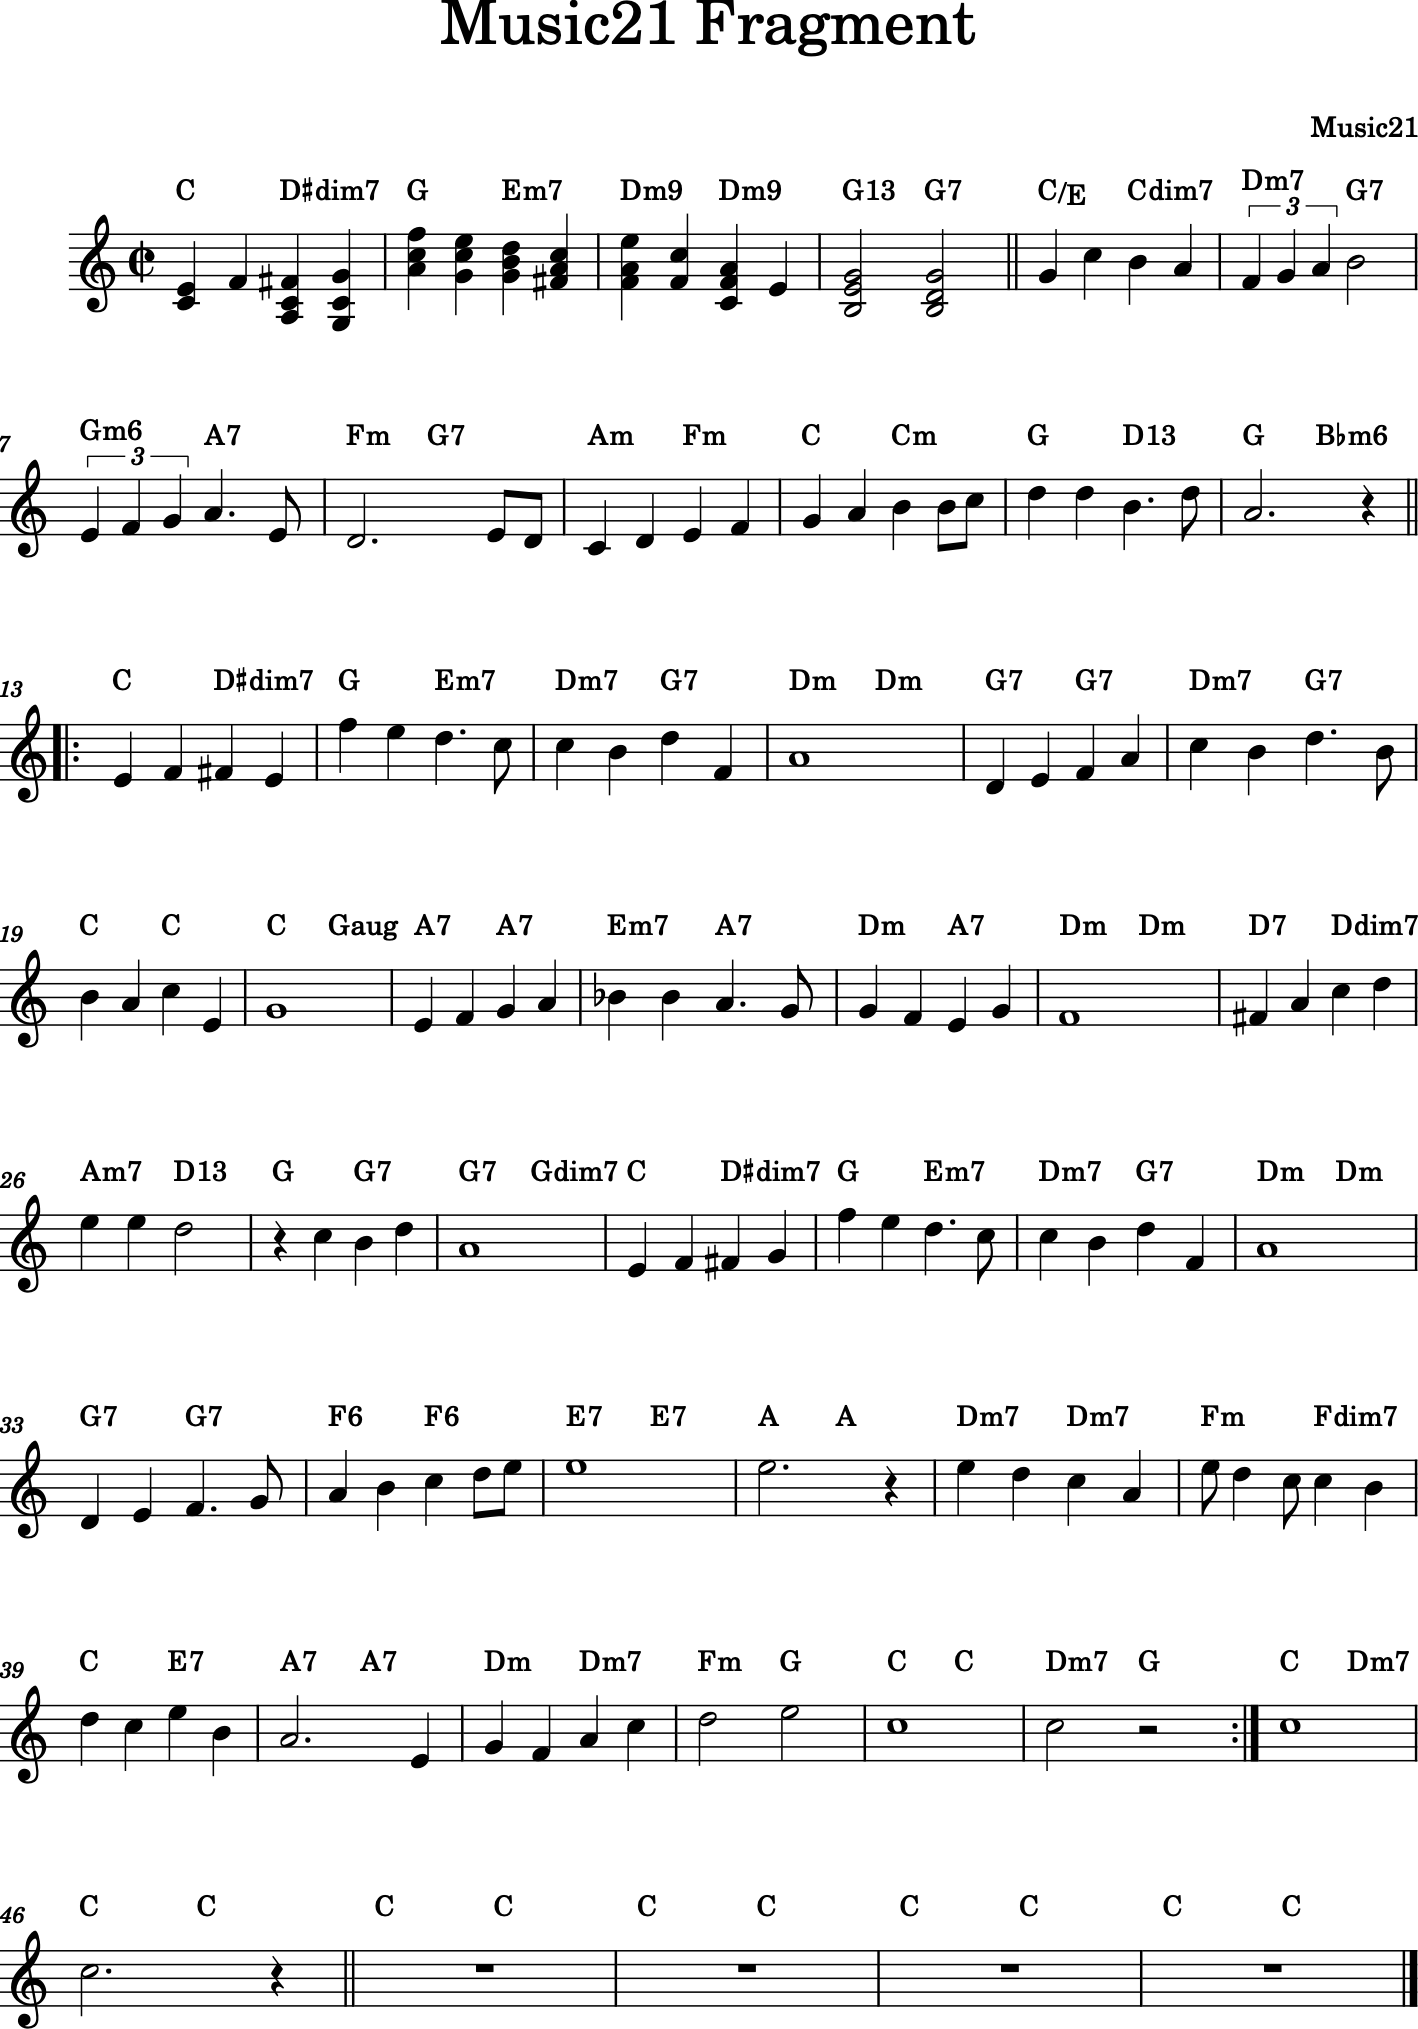

In [90]:
songs[0].show()

In [5]:
# transposed_songs= []
# for song in songs:

#   flat_song = song.flat
#   keySig = flat_song.keySignature
  
#   distance_to_c = interval.Interval(keySig.asKey().tonic, pitch.Pitch('C'))

#   transposed_song = song.transpose(distance_to_c)
#   transposed_songs.append(transposed_song)

# #   print(len(transposed_songs4))

# print("Total songs: ", len(transposed_songs))

transposed_songs = songs

In [36]:
# Next we divide into 8 measure chunks for eventual batching with 2 measure overlaps

eight_measure_chunks = []

for song in transposed_songs:

  num_measures = len(song.parts[0].getElementsByClass(stream.Measure))

  i = 0
  while i+7 < num_measures:
    chunk = song.measures(i,i+8,indicesNotNumbers=True)
    eight_measure_chunks.append(chunk)
    i += 6 # as per paper, we select chunks with two measure overlaps, therefore add 6

print("Number of 8 measure chunks: ", len(eight_measure_chunks))

Number of 8 measure chunks:  873


dlopen error : dlopen(libjack.0.dylib, 0x0001): tried: 'libjack.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/Frameworks/libjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/Frameworks/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file, not in dyld cache), 'libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file, not in dyld cache) 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 0x0001): tried: '/usr/local/lib/libjack.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/lib/libjack.0.dylib' (no such file), '/usr/local/lib/libjack.0.dylib' (no such file) 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/dm/6wgj6qbx79j95xwrmxfmlmqh0000gn/T/music21/tmpotekyiy6.xml>...
JIT is disabled for QML. Property bindings 

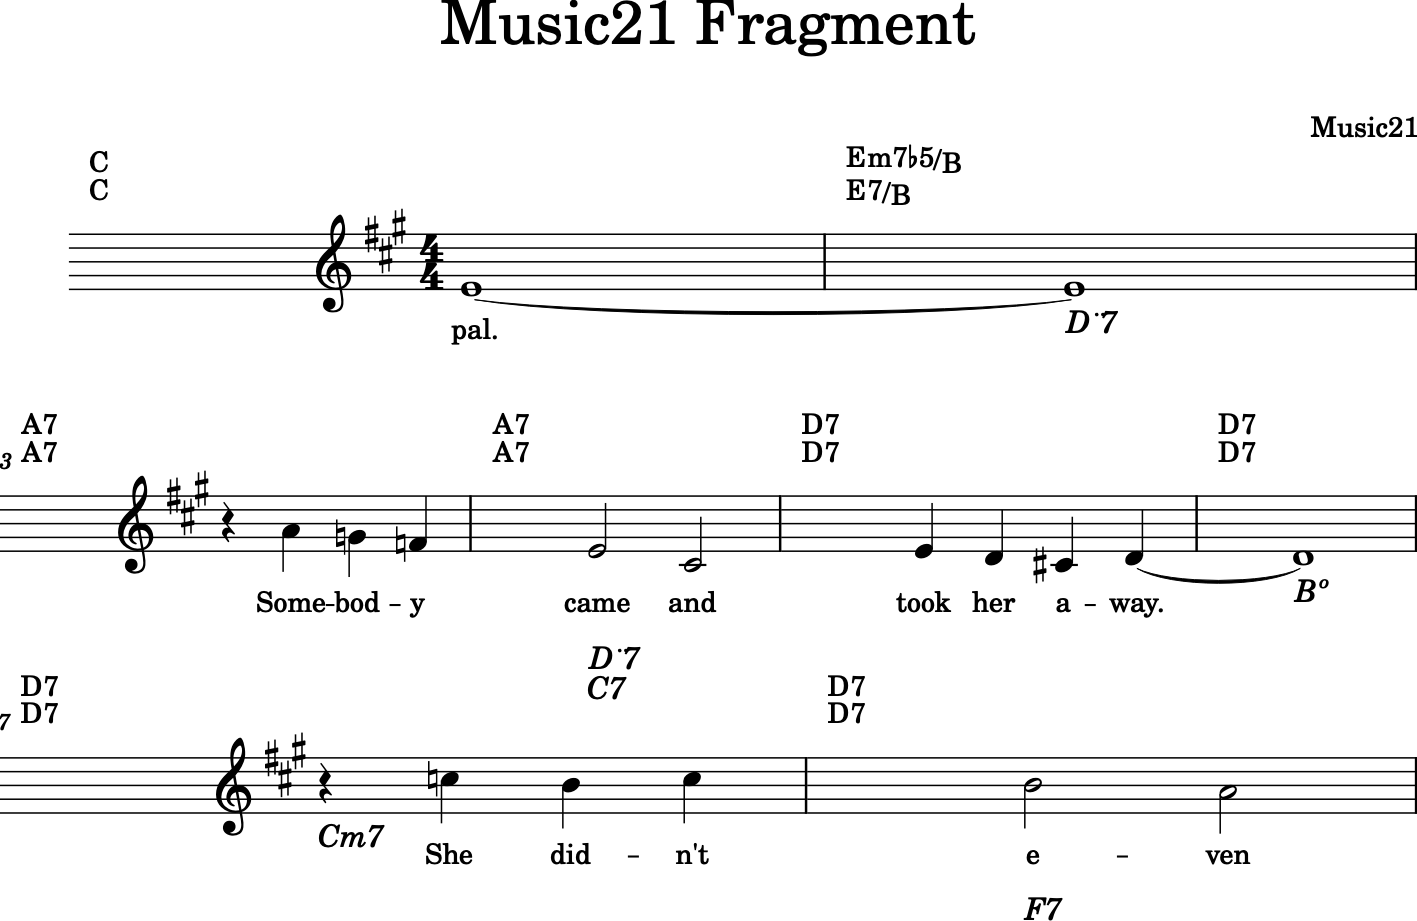

In [37]:
eight_measure_chunks[790].show()

In [35]:
type(music21.chord)

dsfd = chord.Chord()
type(dsfd)

music21.chord.Chord

In [38]:
import copy 

for chunk in eight_measure_chunks:
    

    measures = chunk.parts[0].getElementsByClass(stream.Measure)


    for m in measures:
      notes = m.getElementsByClass(['Note','Rest','Chord'])
      chords = m.getElementsByClass('ChordSymbol')

      toRemove = []
      # chunk.show()
      # if melody is chord, eliminate all voices but top note 
      for note in notes:
        if not isinstance(note,music21.harmony.ChordSymbol) and not isinstance(note,music21.note.Note) and not isinstance(note,music21.note.Rest):
          currOffset = note.offset
          topNote = note.notes[-1]
          # print(topNote.pitch.midi,topNote)
          # print(note)
          
          copyNote = copy.deepcopy(topNote)
          m.remove(note,shiftOffsets=False)
    
          m.insert(currOffset,copyNote)



    

dlopen error : dlopen(libjack.0.dylib, 0x0001): tried: 'libjack.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/Frameworks/libjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/Frameworks/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file, not in dyld cache), 'libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file, not in dyld cache) 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 0x0001): tried: '/usr/local/lib/libjack.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/lib/libjack.0.dylib' (no such file), '/usr/local/lib/libjack.0.dylib' (no such file) 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/dm/6wgj6qbx79j95xwrmxfmlmqh0000gn/T/music21/tmp9tpcdppl.xml>...
JIT is disabled for QML. Property bindings 

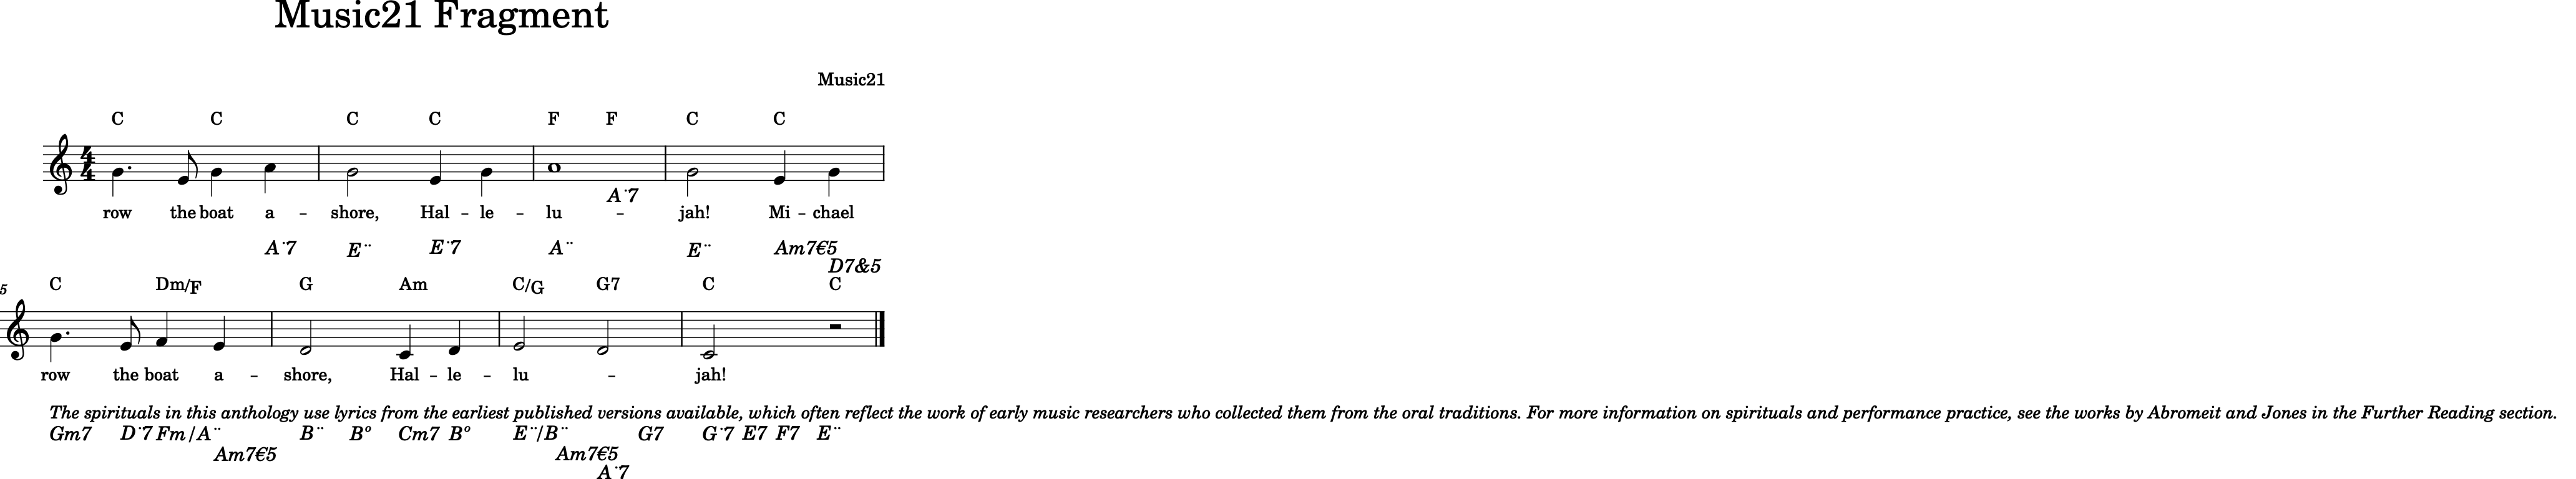

In [28]:
eight_measure_chunks[2].show()

In [39]:
# final preprocessing: convert triplets to 4 16ths/8ths/quarters/

for chunk in eight_measure_chunks:
    found = False
    measures = chunk.parts[0].getElementsByClass(stream.Measure)

    for m in measures:
        notes = m.getElementsByClass(['Note','Rest'])
        for n in notes:

            offset = n.offset
            # remove grace notes 
            if n.duration.isGrace:
                m.remove(n,shiftOffsets=False)
                print('removing triplet')
            
            if n.duration.quarterLength < 0.25:
                m.remove(n,shiftOffsets=False)
                print("removing small note value")
            
            if n.duration.quarterLength % 0.25 != 0:
                m.remove(n,shiftOffsets=False)
                print("removing note non divisible by 16th...")
            
       
    # if found:
    #     chunk.show()

    found = False

       
                

removing note non divisible by 16th...
removing note non divisible by 16th...
removing note non divisible by 16th...
removing small note value
removing note non divisible by 16th...
removing small note value
removing note non divisible by 16th...
removing note non divisible by 16th...


In [40]:
# scan through, replace any gaps with rest
for chunk in eight_measure_chunks:
    found = False
    measures = chunk.parts[0].getElementsByClass(stream.Measure)
    for m in measures:
        m.makeRests(fillGaps=True,inPlace=True,timeRangeFromBarDuration=True)

        

dlopen error : dlopen(libjack.0.dylib, 0x0001): tried: 'libjack.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/Frameworks/libjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/Frameworks/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file, not in dyld cache), 'libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file, not in dyld cache) 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 0x0001): tried: '/usr/local/lib/libjack.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/lib/libjack.0.dylib' (no such file), '/usr/local/lib/libjack.0.dylib' (no such file) 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/dm/6wgj6qbx79j95xwrmxfmlmqh0000gn/T/music21/tmppdiojtzj.xml>...
JIT is disabled for QML. Property bindings 

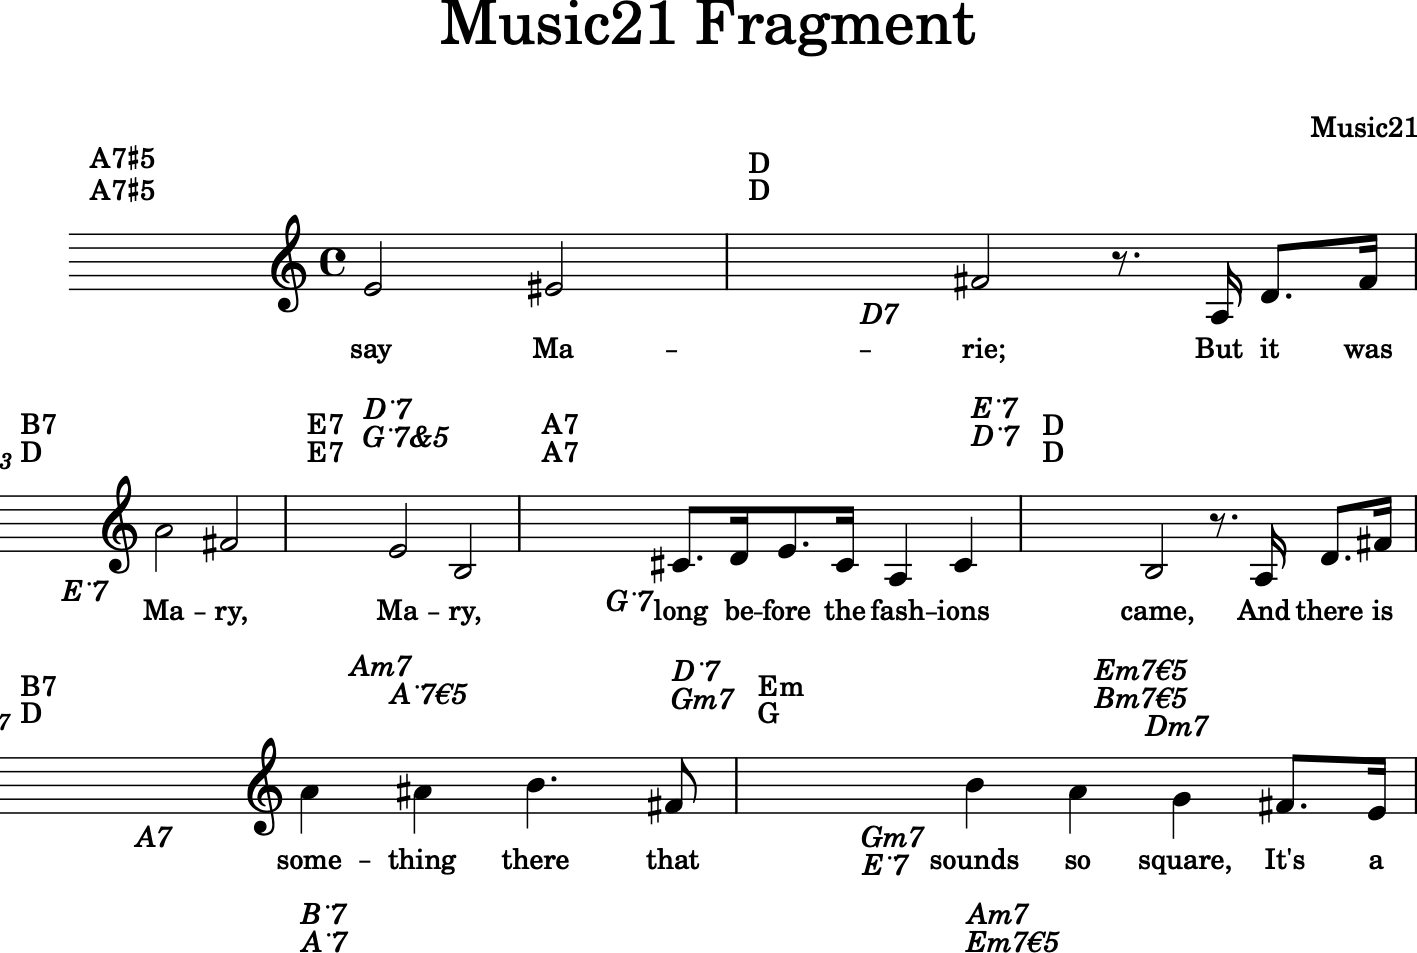

----
{0.0} <music21.stream.Part 0x28c3fbd50>
    {0.0} <music21.instrument.Instrument 'Pd030f69a2ba549a05061b7a1602af372: '>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Measure 7 offset=0.0>
        {0.0} <music21.expressions.TextExpression "D¨7">
        {0.0} <music21.harmony.ChordSymbol A7 alter #5>
        {0.0} <music21.note.Note E>
        {2.0} <music21.expressions.TextExpression "G¨7&5">
        {2.0} <music21.harmony.ChordSymbol A7 alter #5>
        {2.0} <music21.note.Note E#>
    {4.0} <music21.stream.Measure 8 offset=4.0>
        {0.0} <music21.expressions.TextExpression "E¨7">
        {0.0} <music21.harmony.ChordSymbol D>
        {0.0} <music21.note.Note F#>
        {1.0} <music21.expressions.TextExpression "D7">
        {2.0} <music21.expressions.TextExpression "D¨7">
        {2.0} <music21.harmony.ChordSymbol D>
        {2.0} <music21.note.Rest rest>
        {2.75} <music21.note.Note A>
        {3.0} <music

In [42]:
eight_measure_chunks[1].show()

print("----")

eight_measure_chunks[1].show("text")

print("----")

eight_measure_chunks[99].show("text")

In [43]:
z = 0
for chunk in eight_measure_chunks[:45]:
   
    ml = len(chunk.parts[0].getElementsByClass(stream.Measure))
    # print(ml)
    if ml != 8:
        print(ml)
        z += 1
        print(z)

In [44]:
from torch.utils.data import DataLoader
import torch.nn.functional as F
from music21 import *

# next, flatten chunks, seperate out into notes and chords, turn into 16 note frames, 

REST_TOKEN = "rest"
SOS_TOKEN = "<SOS>"
EOS_TOKEN = "<EOS>"

inputs = []
outputs = []

def prepare_data(chunks):
  z = 0
  for chunk in chunks:
    # chunk.show()
    # chunk.show("text")
    flat_chunk = chunk.flat
    notes = flat_chunk.getElementsByClass(['Note','Rest'])
    chords = flat_chunk.getElementsByClass('ChordSymbol')

    # print(chords.show("text"))
    # print(c.show("text"))

    # # chord durations need to be rounded to nearest beat
    # for i,chord in enumerate(chords[:-1]):
    #   chord.duration = duration.Duration(round(chords[i+1].offset-chord.offset))
    #   print("unrounded",chords[i+1].offset-chord.offset)
    # # last duration gets compared to end of chunk
    # chords[-1].duration = duration.Duration(round(32-chords[-1].offset))

    # as dataset enforces two chords per bar, we can also just set duration to half note for now

    for chord in chords:
      chord.duration = duration.Duration(2)

    note_frames = []

    chord_frames = []

    # divide into 16 note frames
    # for example, a quarter note C would become [C,C,C,C...]
    for note in notes:
      noteDuration = int(note.duration.quarterLength*4) # duration in 16th notes
      if note.isRest:
        noteName = "rest" # 0 = rest in our encoding scheme
      else:
        noteName = (note.pitch.midi%12) # map pitches to 0-11 for indexing
      # encode as indice
      encoded_note = noteName
      encoded_note = [encoded_note]*noteDuration # repeat the note its duration number of times (in 16th notes)
      note_frames += encoded_note
    for chord in chords:
     # chordDuration = int(chord.duration.quarterLength*4) # duration in 16th notes
      chordDuration = int(int(chord.duration.quarterLength)/2) # duration in half notes 
      chordName = chord.figure

      encoded_chord = chordName
      # TODO: FOR NOW; 16 CHORDS PER CHUNK = EACH CHORD SYMBOL REPRESENTS ONE HALF NOTE
      encoded_chord = [encoded_chord]*chordDuration # repeat the note its duration number of times (in 16th notes) (or half notes? TODO)
      chord_frames += encoded_chord

    # add SOS and EOS token to input
    note_frames.append(EOS_TOKEN)
    chord_frames.append(EOS_TOKEN) # TODO: is this a problem that they could result in different embeddings?
    chord_frames.insert(0,SOS_TOKEN)

    if len(chord_frames) == 18 and len(note_frames) == 129: # 130: # TODO: investigate why two chunks contain too many chords
      inputs.append(note_frames)
      outputs.append(chord_frames)
      pass
    else:
      print("error: likely a meter change messes with the proper amount of notes...") # TODO: investigate
      # print(len(chord_frames))
      # print(len(note_frames))
      # print(note_frames)
      # print(chunk.show())
      # print("-----")
      z += 1
      print(z)

    # # print(note_frames)
    # print(len(note_frames))
    # print(len(chord_frames))
    # print("------")




prepare_data(eight_measure_chunks)






error: likely a meter change messes with the proper amount of notes...
1
error: likely a meter change messes with the proper amount of notes...
2
error: likely a meter change messes with the proper amount of notes...
3
error: likely a meter change messes with the proper amount of notes...
4
error: likely a meter change messes with the proper amount of notes...
5
error: likely a meter change messes with the proper amount of notes...
6
error: likely a meter change messes with the proper amount of notes...
7
error: likely a meter change messes with the proper amount of notes...
8
error: likely a meter change messes with the proper amount of notes...
9
error: likely a meter change messes with the proper amount of notes...
10
error: likely a meter change messes with the proper amount of notes...
11
error: likely a meter change messes with the proper amount of notes...
12
error: likely a meter change messes with the proper amount of notes...
13
error: likely a meter change messes with the pr

In [45]:
print("Total input/output frames: ", len(inputs),len(outputs))



Total input/output frames:  739 739


In [48]:
print(inputs[9])
print(outputs[9])

combined_data = list(zip(inputs,outputs))

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 2, 2, 2, 2, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 9, 9, 9, 9, 7, 7, 7, 7, 0, 0, 0, 0, 5, 5, 5, 5, 4, 4, 4, 4, 2, 2, 2, 2, 9, 9, 9, 9, 11, 11, 11, 11, 11, 11, 7, 7, '<EOS>']
['<SOS>', 'C', 'C', 'G7', 'G7', 'C', 'C', 'E7', 'E7', 'F', 'A7/E', 'Dm7', 'F#dim', 'C/G', 'A7', 'D7', 'G7', '<EOS>']


In [49]:
file_path = '/Users/antonischristou/Desktop/Melody Harmonization/JAZZ_LS_DATASET.json'

with open(file_path, 'w') as json_file:
    json.dump(combined_data, json_file)

